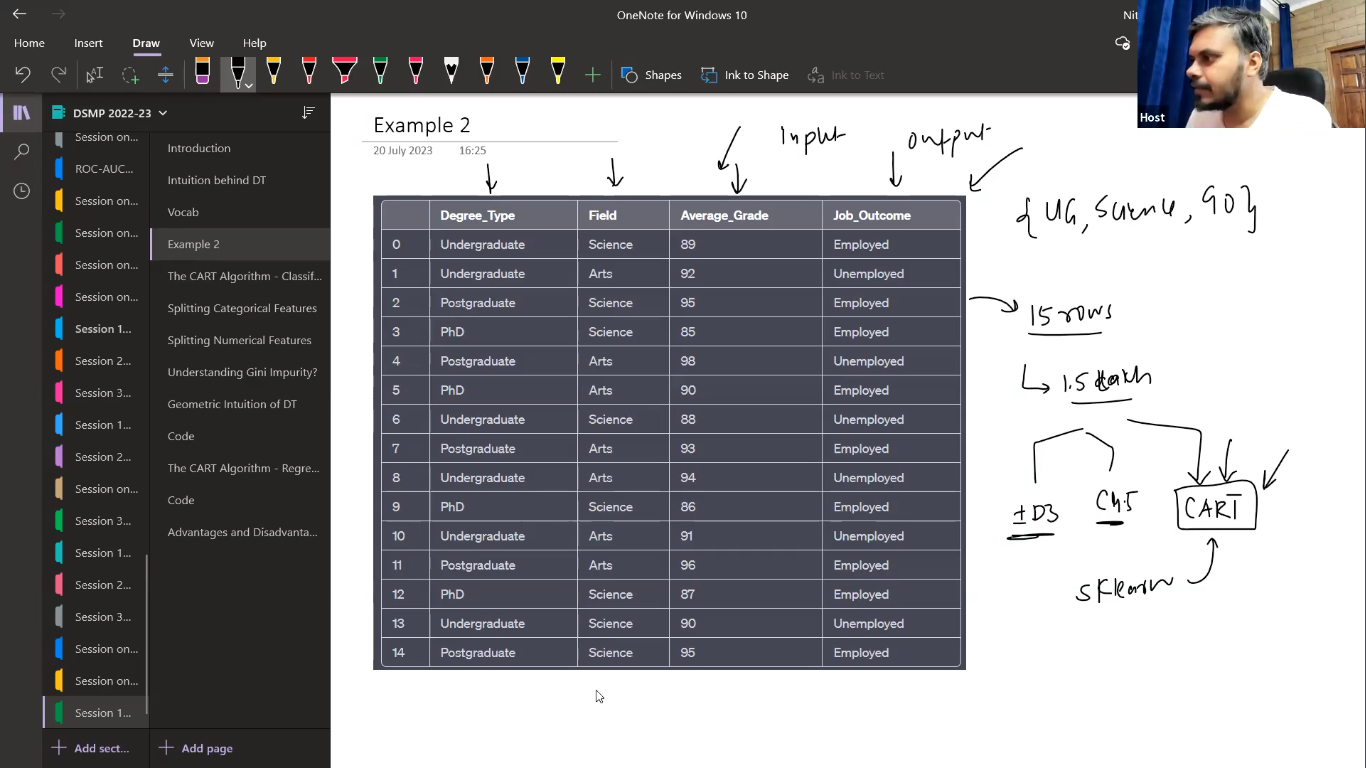

In [ ]:
def predict_job_outcome(degree_type, field, average_grade):
    # Decision tree logic
    if degree_type == "Undergraduate":
        if field == "Science":
            if average_grade >= 90:
                return "Employed"
            else:
                return "Unemployed"
        elif field == "Arts":
            if average_grade >= 92:
                return "Unemployed"
            else:
                return "Employed"
    elif degree_type == "Postgraduate":
        if field == "Science":
            if average_grade >= 95:
                return "Employed"
            else:
                return "Unemployed"
        elif field == "Arts":
            if average_grade >= 93:
                return "Employed"
            else:
                return "Unemployed"
    elif degree_type == "PhD":
        if field == "Science":
            if average_grade >= 85:
                return "Employed"
            else:
                return "Unemployed"
        elif field == "Arts":
            if average_grade >= 90:
                return "Employed"
            else:
                return "Unemployed"
    return "Unknown"  # Default case for invalid inputs

# Example usage
print(predict_job_outcome("Undergraduate", "Science", 92))
print(predict_job_outcome("Postgraduate", "Arts", 99))

Employed
Employed


In [ ]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a more complex dataset
data = {
    "CGPA": [7.5, 8.2, 6.9, 8.7, 7.0, 6.5, 7.8, 9.0, 5.5, 6.0, 8.1, 7.9, 7.2, 8.3, 6.4, 5.8, 9.1, 8.5, 7.4, 6.7],
    "IQ": [110, 120, 100, 130, 105, 95, 115, 140, 85, 90, 125, 118, 107, 132, 92, 89, 138, 127, 113, 99],
    "Extra_Curricular": ["Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "No"],
    "Internship_Months": [6, 12, 3, 15, 0, 2, 8, 18, 0, 0, 10, 9, 5, 16, 1, 4, 20, 14, 7, 3],
    "Comm_Skills": [4, 5, 3, 5, 2, 3, 4, 5, 1, 2, 4, 4, 3, 5, 2, 3, 5, 5, 4, 2],
    "Placed": ["Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df["Extra_Curricular"] = LabelEncoder().fit_transform(df["Extra_Curricular"])  # Yes=1, No=0
df["Placed"] = LabelEncoder().fit_transform(df["Placed"])  # Yes=1, No=0

print(df)


    CGPA   IQ  Extra_Curricular  Internship_Months  Comm_Skills  Placed
0    7.5  110                 1                  6            4       1
1    8.2  120                 0                 12            5       1
2    6.9  100                 1                  3            3       0
3    8.7  130                 1                 15            5       1
4    7.0  105                 0                  0            2       0
5    6.5   95                 0                  2            3       0
6    7.8  115                 1                  8            4       1
7    9.0  140                 1                 18            5       1
8    5.5   85                 0                  0            1       0
9    6.0   90                 0                  0            2       0
10   8.1  125                 1                 10            4       1
11   7.9  118                 0                  9            4       1
12   7.2  107                 1                  5            3 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features and target
X = df.iloc[:,:-1]
y =  df.iloc[:,-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y.unique()

array([1, 0])

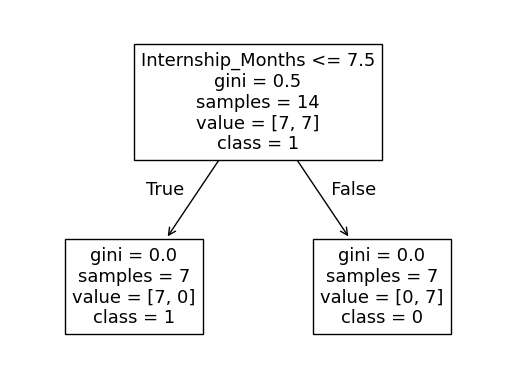

In [ ]:
# Export the decision tree as text to view the splits
import matplotlib.pyplot as plt
tree_rules = plot_tree(tree, feature_names=list(X.columns),class_names=[str(c) for c in y.unique()])
plt.show()

In [ ]:
from sklearn.datasets import load_iris
df=load_iris()
X=df.data[:,:2]
y=df.target

In [ ]:
from sklearn.metrics import accuracy_score
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train a decision tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

75.55555555555556


In [ ]:
accuracy=[]
max_depth_values=[]
for i in range(2,12):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train, y_train)
  y_pred=tree.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred)*100)
  max_depth_values.append(i)

# Find the maximum accuracy and its corresponding max_depth
max_accuracy = max(accuracy)
best_max_depth = max_depth_values[accuracy.index(max_accuracy)]

print(f"Maximum accuracy: {max_accuracy}% with max_depth = {best_max_depth}")

Maximum accuracy: 75.55555555555556% with max_depth = 2


In [ ]:
from sklearn.model_selection import cross_val_score
train_cv_score = cross_val_score(tree, X_train, y_train, cv=10)  # 5-fold CV
test_cv_score = cross_val_score(tree, X_test, y_test, cv=10)  # 5-fold CV
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

0.7709090909090909
0.6449999999999999


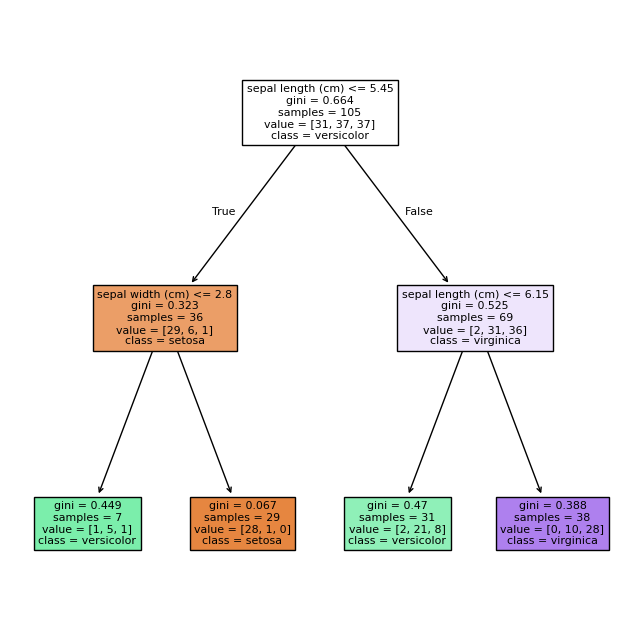

In [ ]:
# Export the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

In [ ]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

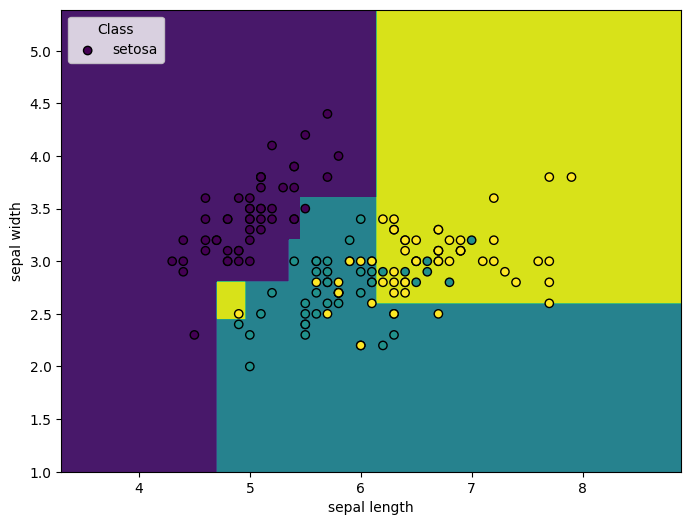

In [ ]:
import numpy as np
plt.figure(figsize=(8,6))
X_min ,X_max=X[:,0].min()-1,X[:,0].max()+1
y_min ,y_max=X[:,1].min()-1,X[:,1].max()+1
XX,yy=np.meshgrid(np.arange(X_min,X_max,0.01),np.arange(y_min,y_max,0.01))
Z=tree.predict(np.c_[XX.ravel(),yy.ravel()])
Z=Z.reshape(XX.shape)
plt.contourf(XX,yy, Z, cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(df.target_names, title="Class", loc='upper left')
plt.show()

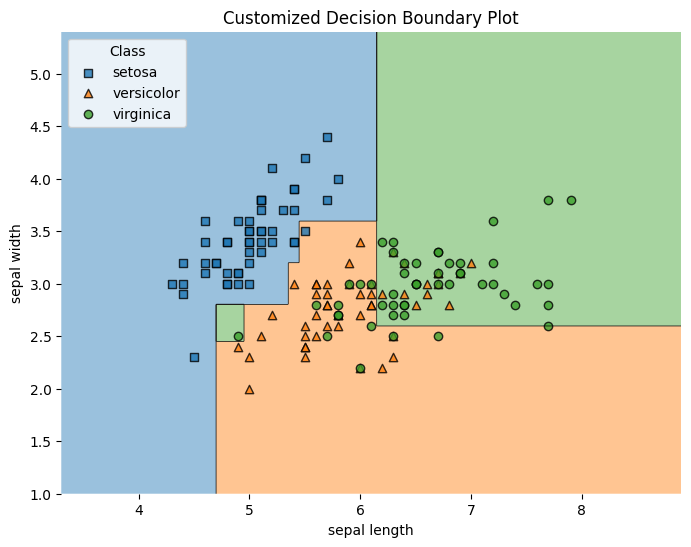

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()

In [ ]:
r=export_text(tree,feature_names=df.feature_names[:2],class_names=df.target_names)
print(r)

|--- sepal length (cm) <= 5.45
|   |--- sepal width (cm) <= 2.80
|   |   |--- class: versicolor
|   |--- sepal width (cm) >  2.80
|   |   |--- class: setosa
|--- sepal length (cm) >  5.45
|   |--- sepal length (cm) <= 6.15
|   |   |--- class: versicolor
|   |--- sepal length (cm) >  6.15
|   |   |--- class: virginica



In [ ]:
sepal_length = 6.2
sepal_width = 3.0
(sepal_length, sepal_width)
tree.predict([[sepal_length, sepal_width]])

array([2])

In [ ]:
def predict_species(sepal_length, sepal_width):
    if sepal_length <= 5.45:
        if sepal_width <= 2.80:
            return "versicolor"  # Lower sepal length and width, classified as versicolor
        else:
            return "setosa"  # Higher sepal width but lower length, classified as setosa
    else:
        if sepal_length <= 6.15:
            return "versicolor"  # Intermediate sepal length, still classified as versicolor
        else:
            if sepal_width > 2.80:
                return "virginica"  # Both higher sepal length and width, classified as virginica
            else:
                return "versicolor"  # Intermediate cases, could also be classified as versicolor

# Example usage
sepal_length = 6.2
sepal_width = 3.0
predicted_species = predict_species(sepal_length, sepal_width)
print(f"Predicted species: {predicted_species}")


Predicted species: virginica


#`Regression with cart(DT)`

Decision Tree Structure:
|--- Subject <= 0.50
|   |--- Hours_Studied <= 5.00
|   |   |--- value: [59.00]
|   |--- Hours_Studied >  5.00
|   |   |--- value: [60.00]
|--- Subject >  0.50
|   |--- Grade_Level <= 0.50
|   |   |--- Hours_Studied <= 6.50
|   |   |   |--- Hours_Studied <= 2.50
|   |   |   |   |--- value: [82.00]
|   |   |   |--- Hours_Studied >  2.50
|   |   |   |   |--- value: [81.00]
|   |   |--- Hours_Studied >  6.50
|   |   |   |--- value: [78.00]
|   |--- Grade_Level >  0.50
|   |   |--- Hours_Studied <= 3.50
|   |   |   |--- Grade_Level <= 1.50
|   |   |   |   |--- value: [85.00]
|   |   |   |--- Grade_Level >  1.50
|   |   |   |   |--- value: [73.00]
|   |   |--- Hours_Studied >  3.50
|   |   |   |--- value: [61.00]



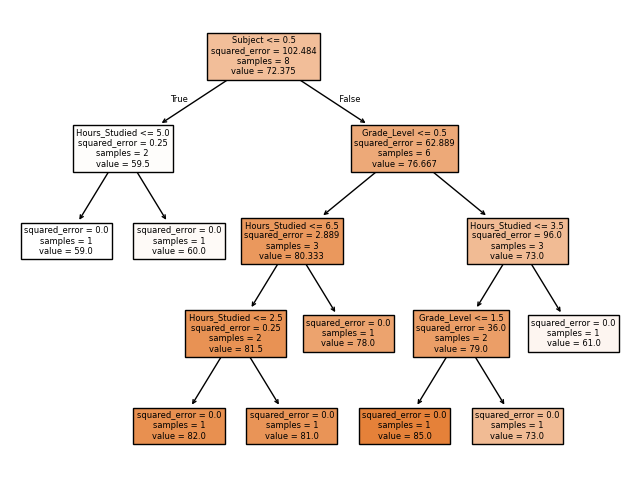

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Create the dataset
data = {
    'Subject': ['Math', 'Physics', 'Physics', 'Math', 'Physics', 'Physics', 'Physics', 'Physics'],
    'Grade_Level': ['Freshman', 'Freshman', 'Freshman', 'Junior', 'Sophomore', 'Junior', 'Junior', 'Freshman'],
    'Hours_Studied': [4, 1, 4, 6, 1, 3, 4, 9],
    'Test_Score': [59, 82, 81, 60, 73, 85, 61, 78]
}

df = pd.DataFrame(data)

# Prepare the data
# Convert categorical variables to numerical using LabelEncoder
le_subject = LabelEncoder()
le_grade = LabelEncoder()

# Encoding categorical variables
X = df[['Subject', 'Grade_Level', 'Hours_Studied']].copy()
X['Subject'] = le_subject.fit_transform(X['Subject'])
X['Grade_Level'] = le_grade.fit_transform(X['Grade_Level'])
y = df['Test_Score']
# Create and fit the decision tree regressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

# Print the exact tree structure
print("Decision Tree Structure:")
print(export_text(tree, feature_names=X.columns))

# Export the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
tree_rules = plot_tree(tree, feature_names=df.columns,filled=True)
plt.show()

In [ ]:
def predict(subject, grade_level, hours_studied):
    if subject <= 0.50:
        if hours_studied <= 5.00:
            return 59.00
        else:
            return 60.00
    else:
        if grade_level <= 0.50:
            if hours_studied <= 6.50:
                if hours_studied <= 2.50:
                    return 82.00
                else:
                    return 81.00
            else:
                return 78.00
        else:
            if hours_studied <= 3.50:
                if grade_level <= 1.50:
                    return 85.00
                else:
                    return 73.00
            else:
                return 61.00

# Example usage:
subject = 1
grade_level = 2
hours_studied = 3.0
prediction = predict(subject, grade_level, hours_studied)
print(f"Predicted value: {prediction}")


Predicted value: 73.0


In [ ]:
X=X.to_numpy()

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X[:,[0,1]], y)

DecisionTreeRegressor(random_state=42)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


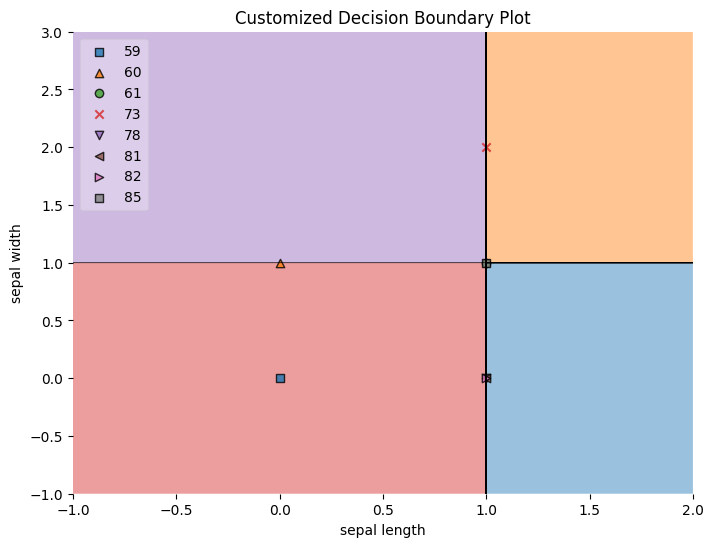

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X[:,[0,1]], y=y.values, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

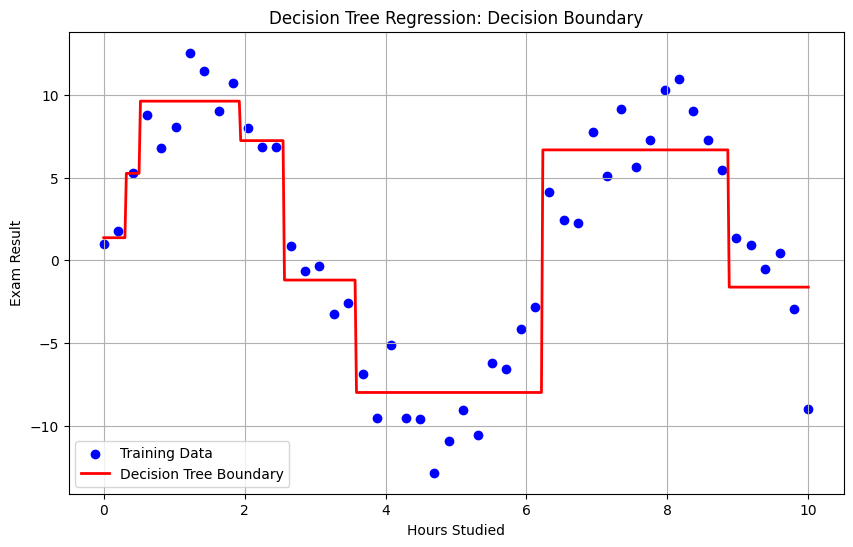

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Step 1: Create Dataset
np.random.seed(42)
hours_studied = np.linspace(0, 10, 50).reshape(-1, 1)  # Hours studied from 0 to 10
exam_result = np.sin(hours_studied).ravel() * 10 + np.random.normal(0, 2, 50)  # Add noise to results
# Step 2: Train Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(hours_studied,exam_result)
# Step 3: Predict for plotting decision boundaries
x_plot = np.linspace(0,10,500).reshape(-1, 1)
y_plot = tree.predict(x_plot)

# Step 4: Plot Data and Decision Boundary
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied, exam_result, color="blue", label="Training Data")
plt.plot(x_plot, y_plot, color="red", linewidth=2, label="Decision Tree Boundary")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Result")
plt.title("Decision Tree Regression: Decision Boundary")
plt.legend()
plt.grid()
plt.show()

In [ ]:
tree.predict([[1200]])

array([-1.61804611])

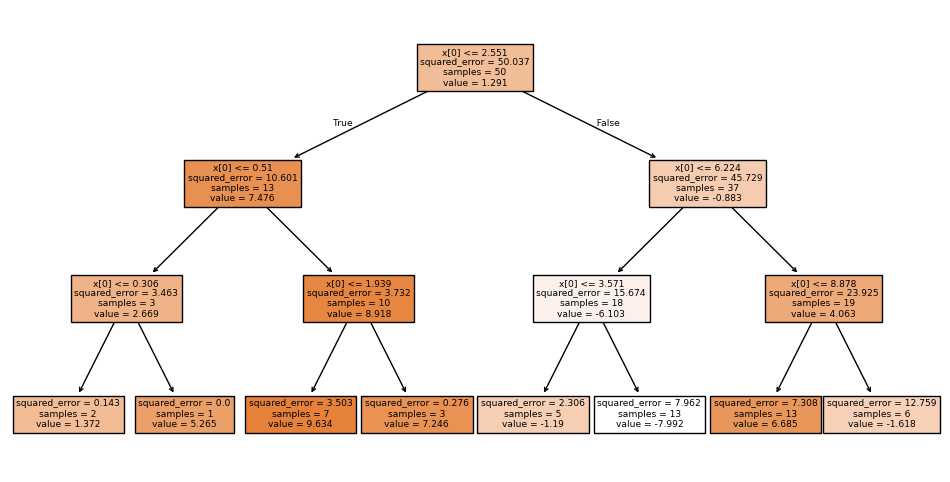

In [ ]:
# Export the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
tree_rules = plot_tree(tree,filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hours_studied, exam_result, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
train_score=[]
test_score=[]
for i in range(2,10):
  tree = DecisionTreeRegressor(max_depth=i)
  tree.fit(X_train,y_train)
  predictions = tree.predict(X_test)
  train_cv_score = cross_val_score(tree, X_train, y_train, cv=5,scoring='r2')  # 5-fold CV
  test_r2_score = r2_score(y_test, predictions)*100
  train_score.append((np.mean(train_cv_score)*100))
  test_score.append(test_r2_score)

In [ ]:
for i in range(len(train_score)):
    print(f"max_depth={i+2}:")
    print(f"  Train R^2 score (cross-validation): {train_score[i]:.2f}%")
    print(f"  Test R^2 score: {test_score[i]:.2f}%")

max_depth=2:
  Train R^2 score (cross-validation): 41.37%
  Test R^2 score: 37.20%
max_depth=3:
  Train R^2 score (cross-validation): 54.41%
  Test R^2 score: 67.51%
max_depth=4:
  Train R^2 score (cross-validation): 62.03%
  Test R^2 score: 75.87%
max_depth=5:
  Train R^2 score (cross-validation): 70.01%
  Test R^2 score: 76.48%
max_depth=6:
  Train R^2 score (cross-validation): 68.32%
  Test R^2 score: 70.32%
max_depth=7:
  Train R^2 score (cross-validation): 67.65%
  Test R^2 score: 72.19%
max_depth=8:
  Train R^2 score (cross-validation): 67.34%
  Test R^2 score: 70.52%
max_depth=9:
  Train R^2 score (cross-validation): 67.71%
  Test R^2 score: 72.09%


In [ ]:
import numpy as np
np.log(500)

6.214608098422191

##`Feature Importance`

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Generate a large regression dataset
X, y = make_regression(n_samples=100000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fit the model on the training set
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
from sklearn.tree import export_text

# Print the decision tree structure
tree_rules = export_text(dt_reg, feature_names=[f"Feature_{i}" for i in range(X.shape[1])])
print(tree_rules)

|--- Feature_6 <= -0.02
|   |--- Feature_0 <= -0.02
|   |   |--- Feature_7 <= -0.11
|   |   |   |--- Feature_8 <= -0.20
|   |   |   |   |--- Feature_3 <= -0.12
|   |   |   |   |   |--- Feature_7 <= -1.04
|   |   |   |   |   |   |--- Feature_6 <= -0.79
|   |   |   |   |   |   |   |--- Feature_0 <= -1.81
|   |   |   |   |   |   |   |   |--- Feature_5 <= -0.72
|   |   |   |   |   |   |   |   |   |--- Feature_4 <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [-795.05]
|   |   |   |   |   |   |   |   |   |--- Feature_4 >  0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [-708.13]
|   |   |   |   |   |   |   |   |--- Feature_5 >  -0.72
|   |   |   |   |   |   |   |   |   |--- Feature_8 <= -0.47
|   |   |   |   |   |   |   |   |   |   |--- value: [-588.83]
|   |   |   |   |   |   |   |   |   |--- Feature_8 >  -0.47
|   |   |   |   |   |   |   |   |   |   |--- value: [-463.28]
|   |   |   |   |   |   |   |--- Feature_0 >  -1.81
|   |   |   |   |   |   |   |   |--- Feature_6

In [ ]:
import pandas as pd
# Get Feature Importances
feature_importances = dt_reg.feature_importances_
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
# Display as a DataFrame
importance_df = pd.DataFrame({
    "Feature":feature_names ,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

      Feature  Importance
6   Feature_7    0.251525
0   Feature_1    0.216121
7   Feature_8    0.200914
8   Feature_9    0.139987
3   Feature_4    0.097115
1   Feature_2    0.073854
5   Feature_6    0.017415
9  Feature_10    0.002107
2   Feature_3    0.000540
4   Feature_5    0.000423


#`Pruning`

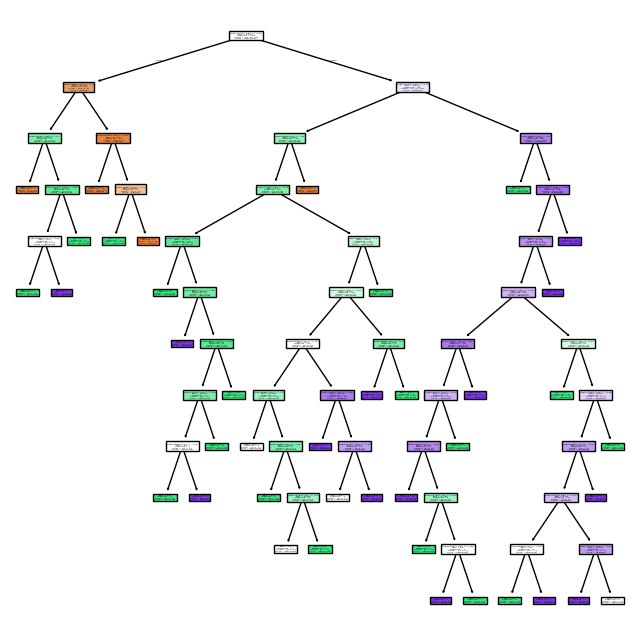

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

##`Max_depth Pruning`

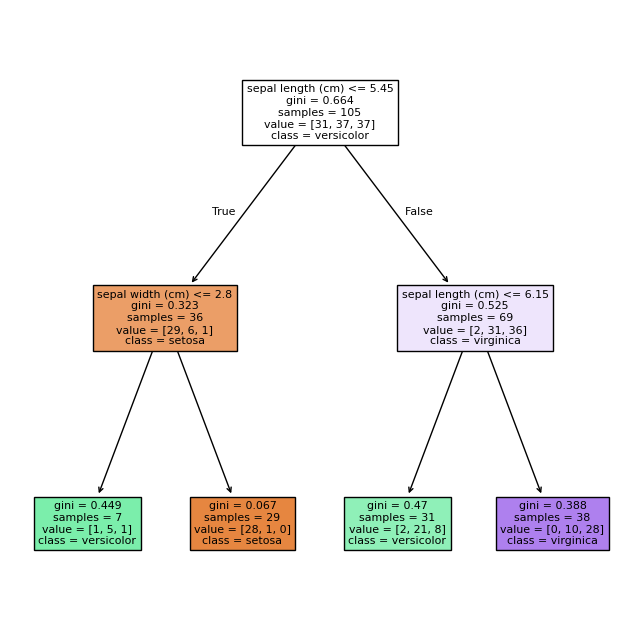

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

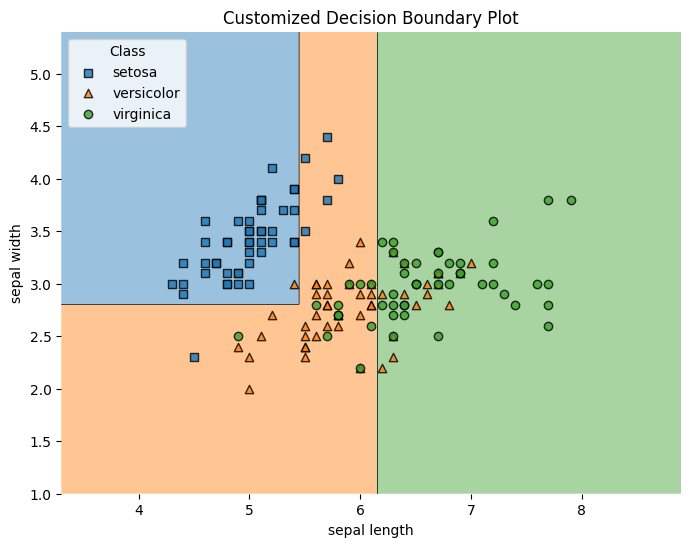

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()

#`minimum sample split`

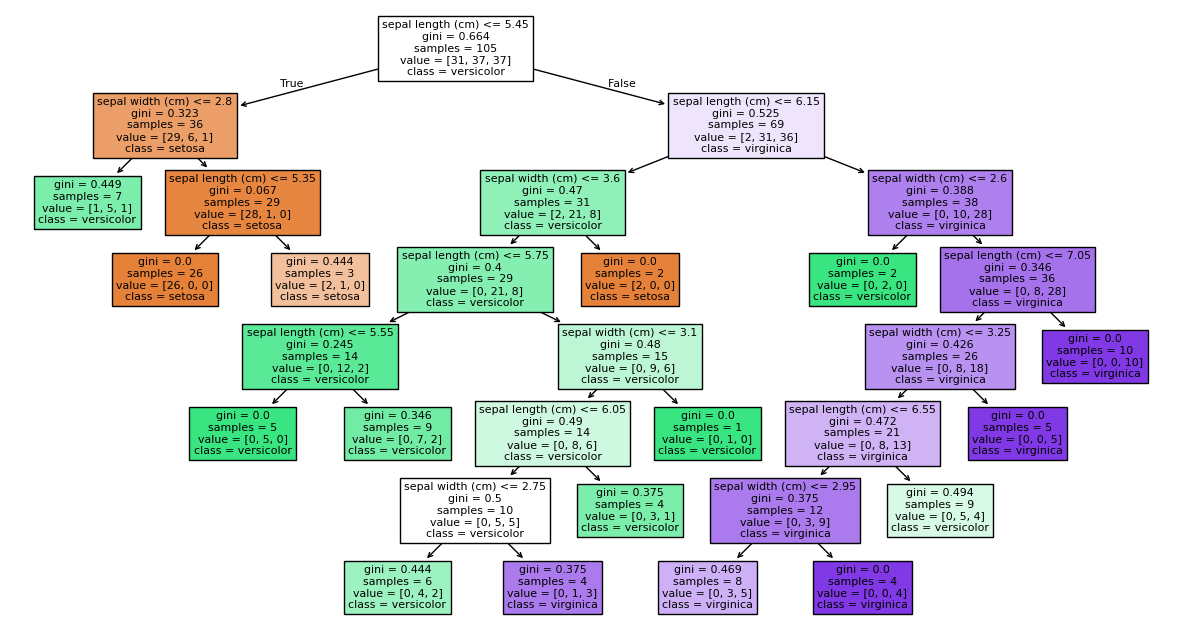

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(min_samples_split=10)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

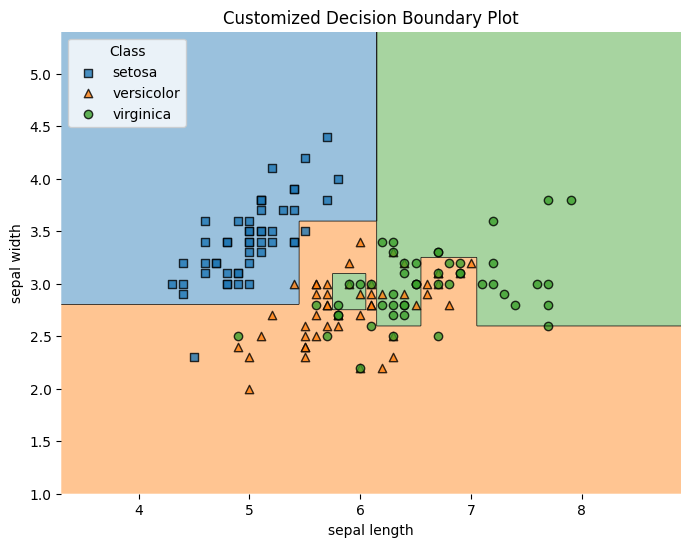

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()

#`min_sample_leaf`

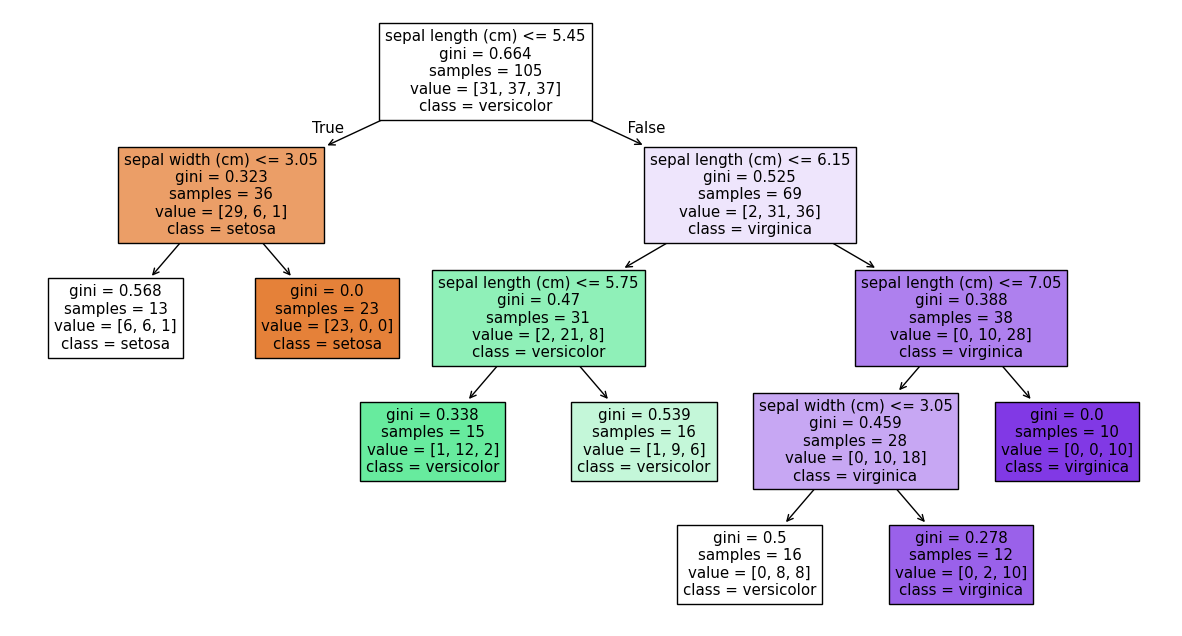

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

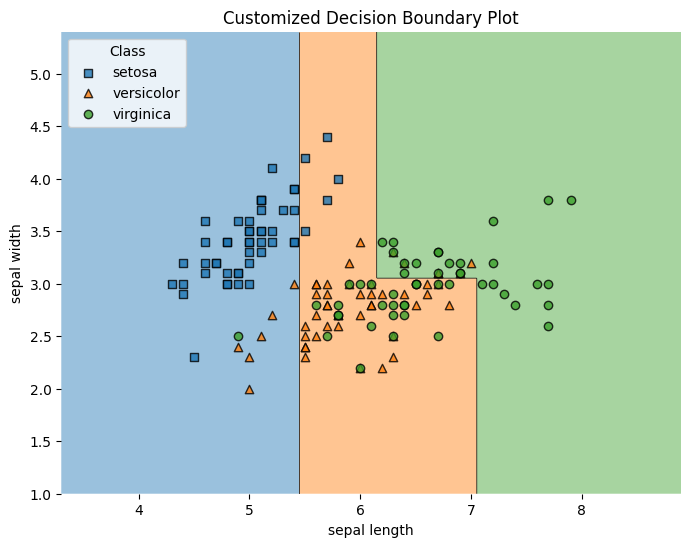

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()

#`Max leaf node`

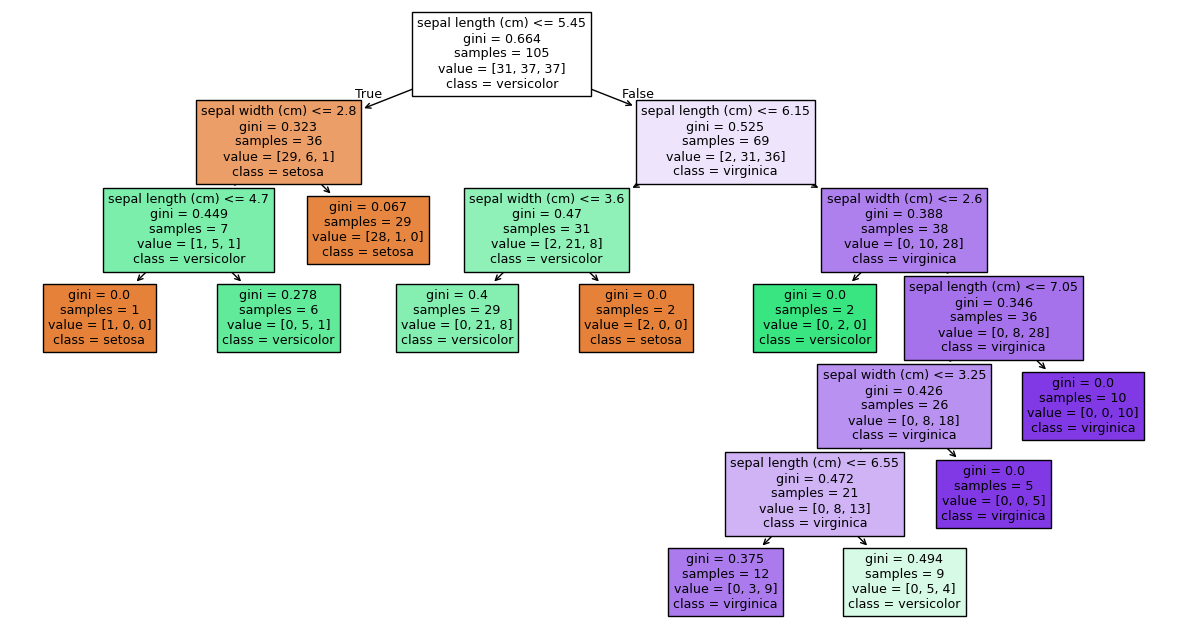

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(max_leaf_nodes=10)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

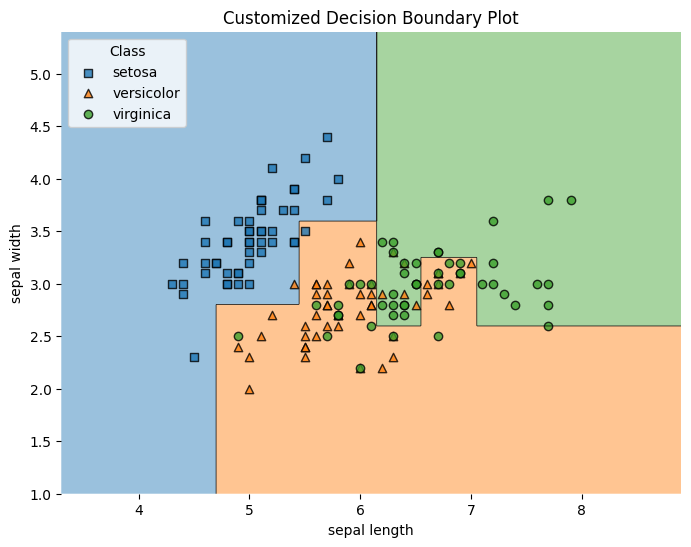

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()

#`min impurity decrease`

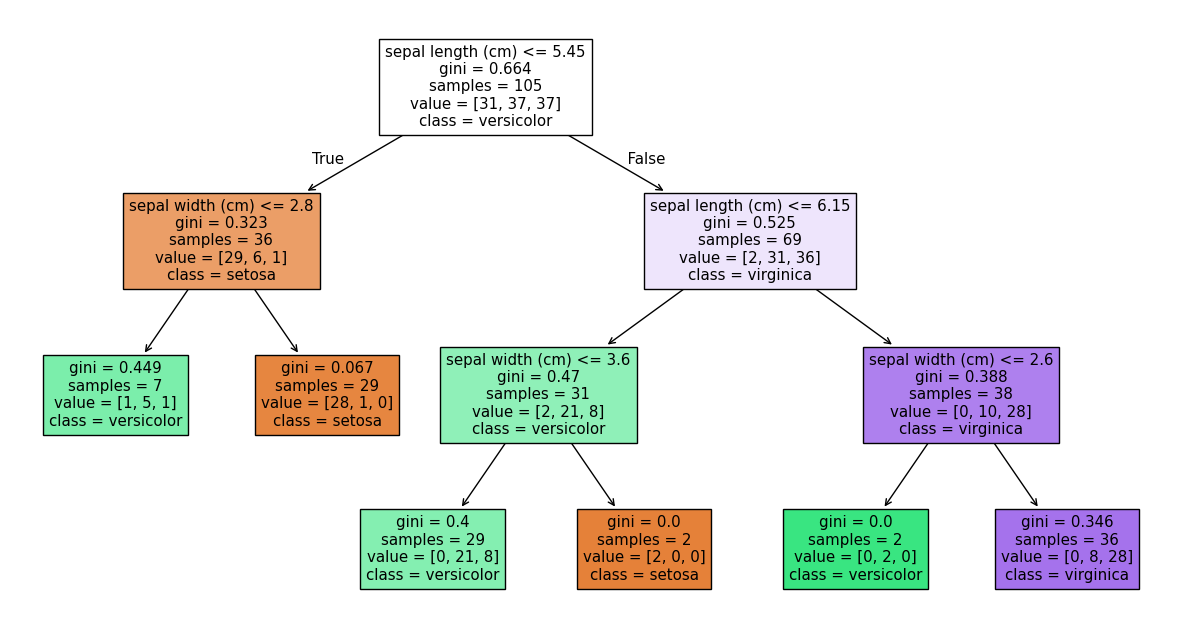

In [ ]:
# Export the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(min_impurity_decrease=0.02)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree_rules = plot_tree(tree, feature_names=df.feature_names[:2],class_names=df.target_names,filled=True)
plt.show()

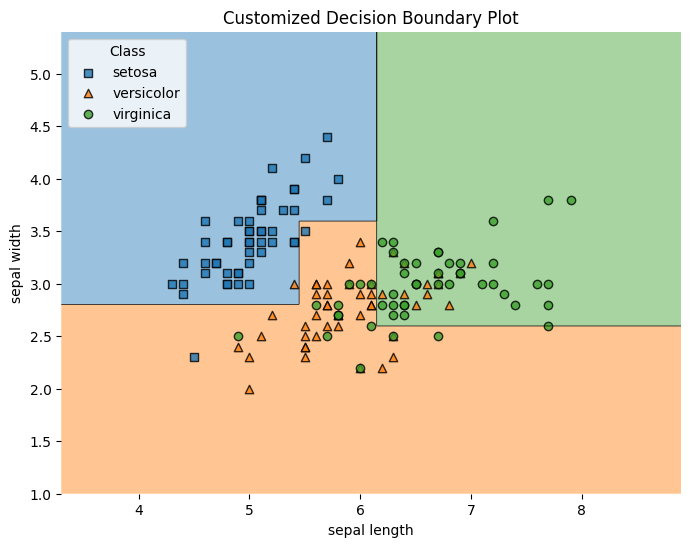

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size

# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=tree, legend=2)

# Customize labels, title, etc.
ax = plt.gca()
ax.set_xlabel('sepal length')  # Custom X-axis label
ax.set_ylabel('sepal width')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
ax.legend(df.target_names, title="Class", loc='upper left')
# Display the plot
plt.show()